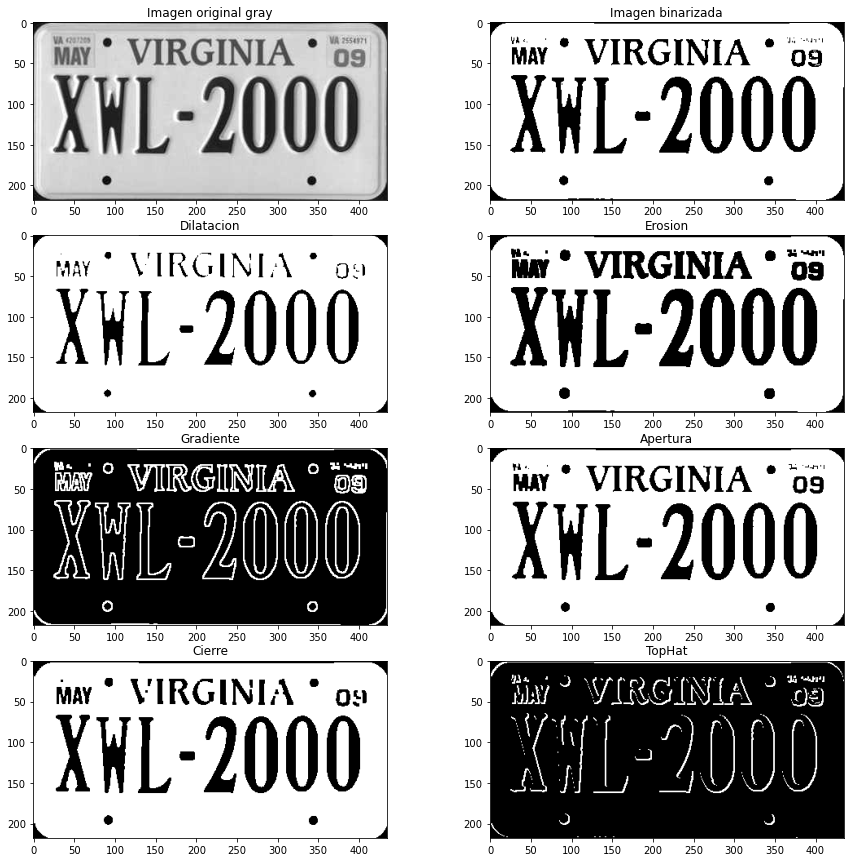

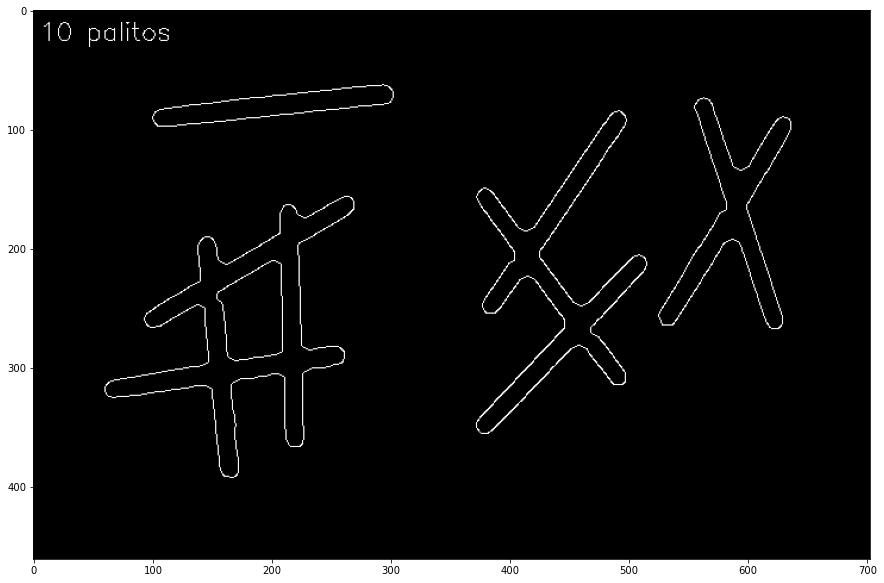

In [83]:
import cv2 #opencv para la lectura de imagen unicamente
import matplotlib.pyplot as plt #matplotlib para mostrar las imagenes embebidos en el notebook
import numpy as np #numpy para trabajar con matrices bidimensionales

########################FILTROS ESPACIALES DESARROLLADOS#######################
#filtro promedio aritmetico
def filtro_promedio_aritmetico(img2):
    m , n = img2.shape                             #tamaño de imagen 
    img=img2.copy()                              #copiamos nuestra imagen en img2
    for i in range(m):                           #los for se utilizan para recorrer cada pixel
        for j in range(n):
            if 0==i and 0==j:                    #  posicion 0,0 
                a0= int (img[0,0])               #garda el dato de el pixel 0,0 en a0 para su posterior calculo
                a1= int (img[0,1])
                a2= int (img[1,0])
                a3= int (img[1,1])
                img2[0,0]= int((a0+a1+a2+a3)/9) #promedio de posiciones que dan como resultado nuestro nuevo 0,0
            elif i==m and j==n:                 #ultima posicion 
                a0= int (img[1279,719])         
                a1= int (img[1278,719])
                a2= int (img[1279,718])
                a3= int (img[1278,718])
                img2[i,j]= int((a0+a1+a2+a3)/9) #sumatoria de las posiciones finales// ya que me genero problemas
            elif i<m-1 and j<n-1:           #en el calculo general de posiciones generales
                a0= int (img[i-1,j-1])
                a1= int (img[i,j-1])
                a2= int (img[i+1,j-1])
                a3= int (img[i-1,j])
                a4= int (img[i+1,j])
                a5= int (img[i-1,j+1])
                a6= int (img[i,j+1])
                a7= int (img[i+1,j+1])
                a8= int (img[i,j])
                img2[i,j]= int((a0+a1+a2+a3+a4+a5+a6+a7+a8)/9)   #toma de lectura y calculo de posiciones generales
    return img2

#filtro no lineal mediana
def no_lineal(img2):
    m , n = img2.shape
    img=img2.copy()
    for i in range(m):
        for j in range(n):
            if 0==i and 0==j:  #posicion inicial
                img2[0,0]= (img[0,0]) 
            elif i==m and j==n:   #posicion final 
                a0= int (img[1279,719])
                a1= int (img[1278,719])
                a2= int (img[1279,718])
                a3= int (img[1278,718])
                img2[i,j]= int((a0+a1+a2+a3)/9)
            elif i<m-1 and j<n-1:#posiciones generales
                a0= int (img[i-1,j-1])
                a1= int (img[i,j-1])
                a2= int (img[i+1,j-1])
                a3= int (img[i-1,j])
                a4= int (img[i+1,j])
                a5= int (img[i-1,j+1])
                a6= int (img[i,j+1])
                a7= int (img[i+1,j+1])
                a8= int (img[i,j])
                lista =[a0,a1,a2,a3,a4,a5,a6,a7,a8]# creacion de lista 
                lista.sort()                    # acomodo de menor a mayor de lista
                img2[i,j]= lista[5]             #tomamos el dato del centro para generar nuestro pixel 
    return img2

#Filtro menos media
def Filtro_menos_media(img2):
    m , n = img2.shape                             #tamaño de imagen 
    img=img2.copy()                              #copiamos nuestra imagen en img2
    Tipo = -1                                     # valor de multiplicacion de matriz
    for i in range(m):                           #los for se utilizan para recorrer cada pixel
        for j in range(n):
            if 0==i and 0==j:                    #  posicion 0,0 
                a0= int (img[0,0]*8)               #garda el dato de el pixel 0,0 en a0 para su posterior calculo
                a1= int (img[0,1]*Tipo)
                a2= int (img[1,0]*Tipo)
                a3= int (img[1,1]*Tipo)
                img2[0,0]= int((a0+a1+a2+a3)/9) #promedio de posiciones que dan como resultado nuestro nuevo 0,0
            elif i==m and j==n:                 #ultima posicion 
                a0= int (img[1279,719]*8)         
                a1= int (img[1278,719]*Tipo)
                a2= int (img[1279,718]*Tipo)
                a3= int (img[1278,718]*Tipo)
                img2[i,j]= int((a0+a1+a2+a3)/9) #sumatoria de las posiciones finales// ya que me genero 
            elif i<m-1 and j<n-1:           #problemas en el calculo general posiciones generales
                a0= int (img[i-1,j-1]*Tipo)
                a1= int (img[i,j-1]*Tipo)
                a2= int (img[i+1,j-1]*Tipo)
                a3= int (img[i-1,j]*Tipo)
                a4= int (img[i+1,j]*Tipo)
                a5= int (img[i-1,j+1]*Tipo)
                a6= int (img[i,j+1]*Tipo)
                a7= int (img[i+1,j+1]*Tipo)
                a8= int (img[i,j]*8)
                img2[i,j]= int((a0+a1+a2+a3+a4+a5+a6+a7+a8)/9)   #toma de lectura y calculo de posiciones generales
    return img2

#Filtro menos no lineal
def filtro_menos_no_lineal(img2):
    m , n = img2.shape
    Tipo = -1
    Centro = 8       # genera mejor filtrado con 8.5 --> valor teorico 8 
    img=img2.copy()
    for i in range(m):
        for j in range(n):
            if 0==i and 0==j:  #posicion inicial
                img2[0,0]= (img[0,0]) 
            elif i==m and j==n:   #posicion final 
                a0= int (img[1279,719]*Tipo)
                a1= int (img[1278,719]*Tipo)
                a2= int (img[1279,718]*Tipo)
                a3= int (img[1278,718]*Tipo)
                img2[i,j]= int((a0+a1+a2+a3)/9)
            elif i<m-1 and j<n-1:#posiciones generales
                a0= int (img[i-1,j-1]*Tipo)
                a1= int (img[i,j-1]*Tipo)
                a2= int (img[i+1,j-1]*Tipo)
                a3= int (img[i-1,j]*Tipo)
                a4= int (img[i+1,j]*Tipo)
                a5= int (img[i-1,j+1]*Tipo)
                a6= int (img[i,j+1]*Tipo)
                a7= int (img[i+1,j+1]*Tipo)
                a8= int (img[i,j]*Centro)
                lista =[a0,a1,a2,a3,a4,a5,a6,a7,a8]# creacion de lista 
                lista.sort()                    # acomodo de menor a mayor de lista
                img2[i,j]= lista[5]             #tomamos el dato del centro para generar nuestro pixel 
    return img2

########################FILTROS MORFOLOGICOS DESARROLLADOS#######################

#Para ejecutar las operaciones morfologicas es necesario binarizar la imagen es decir adoptar unicamente 2 valores
#0 --> Negro | 255 --> Blanco, de esta forma se podrá recién ejecutar las transformaciones

#Algoritmo de binarizado
def binarizar(img):
    m,n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    imgOut=img.copy() #Copiamos la imagen de entrada en otra variable a fin de modificar cada pixel segun resultados
    for i in range(m): #Recorremos en ancho
        for j in range(n): #Recorremos en alto
            if img[i,j]>=128: #Si el valor del gris encontrado es >=128 definimos como valor de salida 255 -->Blanco
                imgOut[i,j]=255
            else: #Caso contrario asignamos como nuevo valor del pixel 0 -->Negro
                imgOut[i,j]=0
    return imgOut #Retornamos la nueva imagen binarizada

#Algoritmo de dilatacion para un elemento estructural tipo cuadrado
#La funcion contiene 3 argumentos: la imagen de entrada, el kernel o elemento estructural y la cantidad de veces
#deseemos se ejecute el proceso.
def dilatar(img,kernel, rep):
    m, n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    imgOut=img.copy() #Copiamos la imagen de entrada en otra matriz a fin de modificar cada pixel segun resultados
    
    for z in range(rep): #Cantidad de veces que ejecutaremos el algoritmo
        f=np.pad(imgOut,(1,1),'edge') #Modificamos el tamaño de la matriz añadiendo 1 pixel en todo el borde a fin
                                      #de evitar desbordamiento y la almacenamos en la matriz f
        for i in range(1,m): #Recorremos en ancho
            for j in range(1,n): #Recorremos en alto
                if np.sum(kernel*f[i-1:i+2,j-1:j+2])>=255: #Si la suma de los elementos del resultante de la
                    #multiplicacion del elemento estructural y la muestra tomada de la matriz f es >=255
                    imgOut[i,j]=255 #entonces le asignamos como valor 255 --> blanco, de esta forma los pixeles
                                #vecinos a un pixel blanco adoptaran el valor 255 en un rango 3x3 recursivamente 
    
    return imgOut #retornamos la imagen resultante

#Algoritmo de erosion para un elemento estructural tipo cuadrado
#Al igual que la funcion dilatacion tiene 3 argumentos con la misma finalidad, sin embargo es obligatorio usar un
#elemento estructural 3x3 cuyos elementos son 1, caso contrario el resultado no será el esperado
def erosionar(img, kernel, rep):
    m, n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    imgOut=img.copy() #Copiamos la imagen de entrada en otra matriz a fin de modificar cada pixel segun resultados
    
    for z in range(rep): #Cantidad de veces que ejecutaremos el algoritmo
        f=np.pad(imgOut,(1,1),'edge') #Modificamos el tamaño de la matriz añadiendo 1 pixel en todo el borde a fin
                                      #de evitar desbordamiento y la almacenamos en la matriz f
        for i in range(1,m): #Recorremos en ancho
            for j in range(1,n): #Recorremos en alto
                if np.sum(kernel*f[i-1:i+2,j-1:j+2])<255*9: #Si la suma de los elementos del resultante de la
                    #multiplicacion del elemento estructural y la muestra tomada de la matriz f es < 9*255
                    #es decir si no existiese pixel negro alguno, entonces asignamos 0 al pixel de salida 
                    imgOut[i,j]=0 #de esta forma los vecinos a un pixel blanco adoptaran el valor negro en un rango
                                  #3x3 recursivamente
    
    return imgOut #retornamos la imagen resultante


#Algoritmo de gradiente morfológico: dilatacion - erosion
def gradiente(img):
    imgD=dilatar(img,kernel,1) #obtenemos la matriz luego del proceso de dilatación para la imagen de entrada
    imgE=erosionar(img,kernel,1) #obtenemos la matriz luego del proceso de erosión para la imagen de entrada
    imgOut=img.copy() # Copiamos la imagen a fin de modificar cada pixel según la lógica del algoritmo
    m,n=img.shape #Obtenemos las dimensiones de la imagen de entrada
    for i in range(1,m): #Recorremos en ancho
        for j in range(1,n): #Recorremos en alto
            if (imgD[i,j]-imgE[i,j])<=0: #Si la diferencia del valor del pixel de la imagen dilatada con la
                # erosionada es <=0 entonces se asigna como pixel de salida 0 --> Negro
                imgOut[i,j]=0
            else: # caso contrario se asigna 255 --> blanco
                imgOut[i,j]=255
    return imgOut #retornamos la imagen resultante

#Algoritmo de apertura: primero erosion y luego dilatacion
def apertura(img):
    img=erosionar(img,kernel,1)
    img=dilatar(img,kernel,1)
    return img

#Algoritmo de cierre: primero dilatacion y luego erosion
def cierre(img):
    img=dilatar(img,kernel,1)
    img=erosionar(img,kernel,1)
    return img

#Algoritmo de tophat: imagen original - imagen erosionada
def tophat(img):
    imgE=erosionar(img,kernel,1)
    imgOut=img.copy()
    m,n=img.shape
    for i in range(1,m):
        for j in range(1,n):
            if (img[i,j]-imgE[i,j])<=0:
                imgOut[i,j]=0
            else:
                imgOut[i,j]=255
    return imgOut

############ Ejecución de la actividad ###############>
kernel = np.ones((3,3),np.uint8) #Definicion del elemento estructural
img=cv2.imread('placa.jpg',0) #Lectura a escala de grises

imgB=binarizar(img) #Binarizado
imgD=dilatar(imgB,kernel,1) #Dilatado
imgE=erosionar(imgB,kernel,1) #Erosionado
imgG=gradiente(imgB) #Gradiente morfologico
imgA=apertura(imgB) #Apertura
imgC=cierre(imgB) #Cierre
imgT=tophat(imgB) #Tophat

plt.figure(figsize=(15,15))
plt.subplot(421)
plt.imshow(img, cmap="gray")
plt.title("Imagen original gray")
plt.subplot(422)
plt.imshow(imgB, cmap="gray")
plt.title("Imagen binarizada")
plt.subplot(423)
plt.imshow(imgD, cmap="gray")
plt.title("Dilatacion")
plt.subplot(424)
plt.imshow(imgE, cmap="gray")
plt.title("Erosion")
plt.subplot(425)
plt.imshow(imgG, cmap="gray")
plt.title("Gradiente")
plt.subplot(426)
plt.imshow(imgA, cmap="gray")
plt.title("Apertura")
plt.subplot(427)
plt.imshow(imgC, cmap="gray")
plt.title("Cierre")
plt.subplot(428)
plt.imshow(imgT, cmap="gray")
plt.title("TopHat")


################################### RETO ####################################
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) 
img=cv2.imread('palitos.png',0) # Probar con palitos.png y palitos2.png
ret,th = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
th=cv2.erode(th,kernel,iterations=1)
th=cv2.dilate(th,kernel,iterations=3)
th=cv2.erode(th,kernel,iterations=3)
th=cv2.Canny(th,100,200)

contours, hierarchy = cv2.findContours(th, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cnt=str(len(contours)) + " palitos"
cv2.putText(th,cnt,(5,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),1)

plt.figure(figsize=(15,15))
plt.imshow(th,cmap="gray")


